In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score,roc_curve,classification_report

In [3]:
bank = pd.read_csv("bank-full.csv",sep=";")

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank.shape

(45211, 17)

In [6]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<AxesSubplot:xlabel='age'>

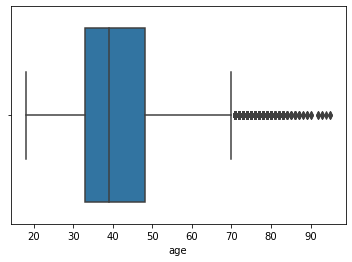

In [9]:
sns.boxplot('age',data=bank)

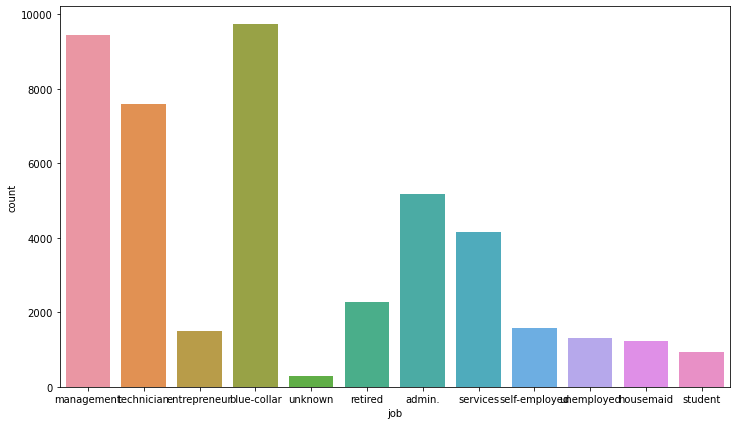

In [10]:
plt.figure(figsize=(12,7))
sns.countplot(x='job',data=bank)
plt.show()

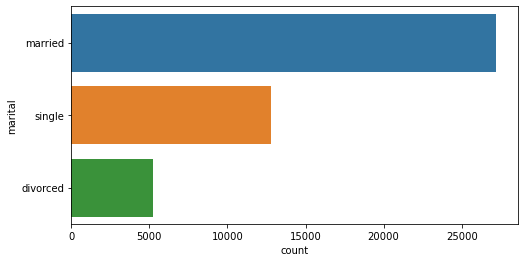

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(y='marital',data=bank)
plt.show()

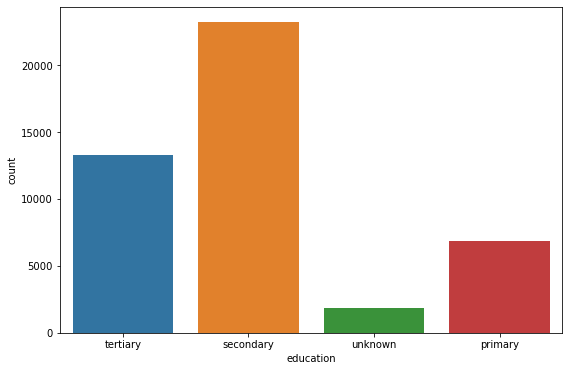

In [12]:
plt.figure(figsize=(9,6))
sns.countplot(x='education',data=bank)
plt.show()

<AxesSubplot:xlabel='balance'>

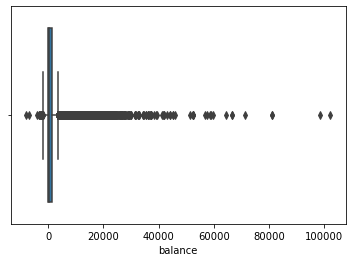

In [13]:
sns.boxplot(data=bank,x='balance')

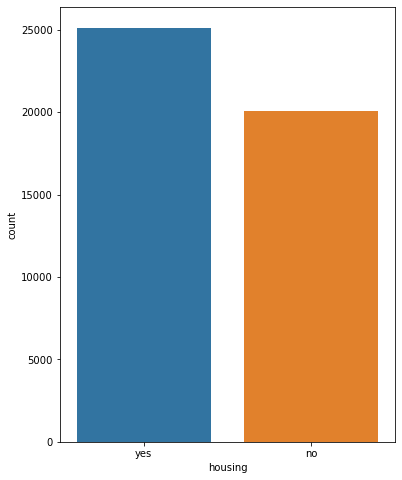

In [14]:
plt.figure(figsize=(6,8))
sns.countplot(x='housing',data=bank)
plt.show()

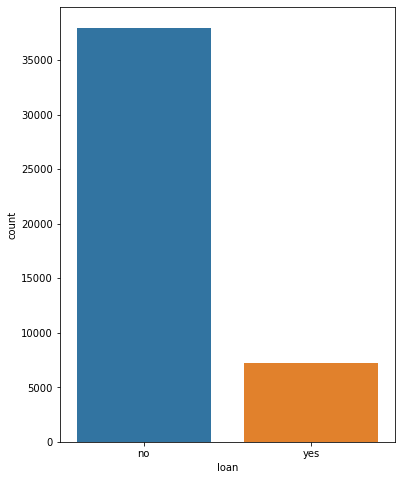

In [15]:
plt.figure(figsize=(6,8))
sns.countplot(x='loan',data=bank)
plt.show()

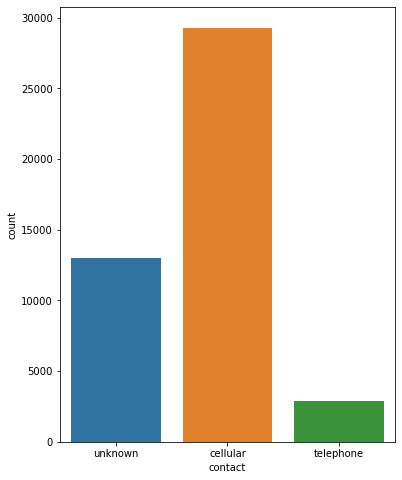

In [16]:
plt.figure(figsize=(6,8))
sns.countplot(x='contact',data=bank)
plt.show()

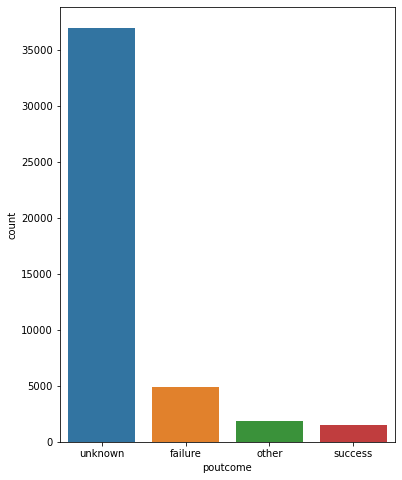

In [17]:
plt.figure(figsize=(6,8))
sns.countplot(x='poutcome',data=bank)
plt.show()

In [18]:
bank.drop('default',axis=1,inplace=True)

In [19]:
le = LabelEncoder()
bank['job'] = le.fit_transform(bank['job'])
bank['marital'] = le.fit_transform(bank['marital'])
bank['education'] = le.fit_transform(bank['education'])
bank['housing'] = le.fit_transform(bank['housing'])
bank['loan'] = le.fit_transform(bank['loan'])
bank['contact'] = le.fit_transform(bank['contact'])
bank['poutcome'] = le.fit_transform(bank['poutcome'])
bank['month'] = le.fit_transform(bank['month'])

In [20]:
bank.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,1,0,0,2,5,8,198,1,-1,0,3,no


In [21]:
x = bank.iloc[:,:-1]
y = bank.iloc[:,-1:]

In [22]:
std = StandardScaler()
scale = std.fit_transform(x)
x_std = pd.DataFrame(scale,columns=x.columns)
x_std.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.606965,-0.103820,-0.275762,1.036362,0.256419,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.011016,-0.569351,-0.411453,-0.25194,0.444898
1,0.288529,1.424008,1.368372,-0.300556,-0.437895,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.416127,-0.569351,-0.411453,-0.25194,0.444898
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.446762,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.707361,-0.569351,-0.411453,-0.25194,0.444898
3,0.571051,-1.020516,-0.275762,2.373280,0.047205,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.645231,-0.569351,-0.411453,-0.25194,0.444898
4,-0.747384,2.035139,1.368372,2.373280,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,0.823773,-0.233620,-0.569351,-0.411453,-0.25194,0.444898


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.20)

In [24]:
x_train.shape,y_train.shape

((36168, 15), (36168, 1))

In [25]:
x_test.shape,y_test.shape

((9043, 15), (9043, 1))

In [26]:
classifiaction_model = LogisticRegression()
classifiaction_model.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_train_pred = classifiaction_model.predict(x_train)
y_train_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

## Training Accuracy

In [28]:
print('Training Accuracy :',    accuracy_score(y_train,y_train_pred))

Training Accuracy : 0.8917827914178279


In [29]:
print('Classification Report for Training Data:\n',classification_report(y_train,y_train_pred))

Classification Report for Training Data:
               precision    recall  f1-score   support

          no       0.90      0.98      0.94     31961
         yes       0.60      0.22      0.32      4207

    accuracy                           0.89     36168
   macro avg       0.75      0.60      0.63     36168
weighted avg       0.87      0.89      0.87     36168



In [30]:
y_train_le = le.fit_transform(y_train)
y_train_pred_le = le.fit_transform(y_train_pred)

In [31]:
auc_train = roc_auc_score(y_train_le,y_train_pred_le)
auc_train

0.5991199221757721

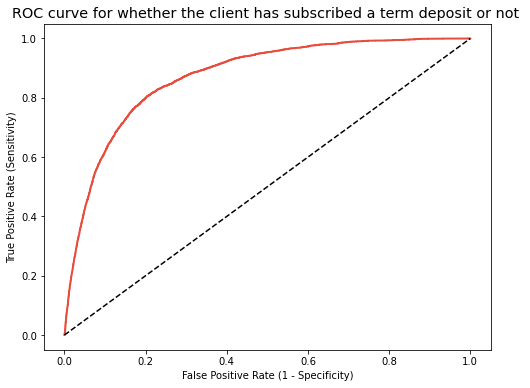

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve( y_train_le,  classifiaction_model.predict_proba(x_train)[:,1])


plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2,color='#E74C3C')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for whether the client has subscribed a term deposit or not ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


## Testing Accuracy

In [33]:
y_test_pred = classifiaction_model.predict(x_test)
y_test_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [34]:
print('Testing Accuracy :',    accuracy_score(y_test,y_test_pred))

Testing Accuracy : 0.8874267389140772


In [35]:
print('Classification Report for Training Data:\n',classification_report(y_train,y_train_pred))

Classification Report for Training Data:
               precision    recall  f1-score   support

          no       0.90      0.98      0.94     31961
         yes       0.60      0.22      0.32      4207

    accuracy                           0.89     36168
   macro avg       0.75      0.60      0.63     36168
weighted avg       0.87      0.89      0.87     36168



### The training accuracy and testing accuracy are almost the same.

In [36]:
y_test_le = le.fit_transform(y_test)
y_test_pred_le = le.fit_transform(y_test_pred)

In [37]:
auc_test = roc_auc_score(y_test_le,y_test_pred_le)
auc_test

0.597456036254374

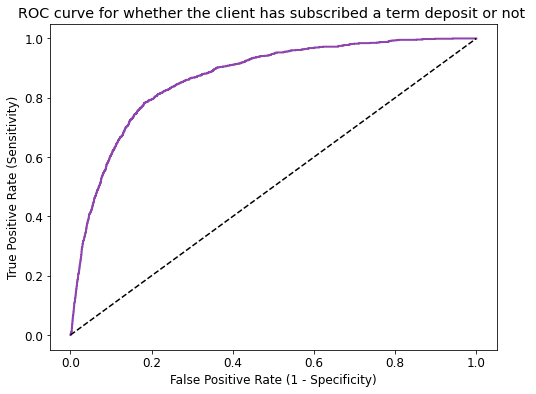

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve( y_test_le, classifiaction_model.predict_proba(x_test)[:,1])


plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2,color='#8E44AD')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for whether the client has subscribed a term deposit or not ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


## Confusion Matrix

In [41]:
# For training data
print(confusion_matrix(y_train,y_train_pred))

[[31338   623]
 [ 3291   916]]


In [42]:
#For testing data
print(confusion_matrix(y_test,y_test_pred))

[[7791  170]
 [ 848  234]]
